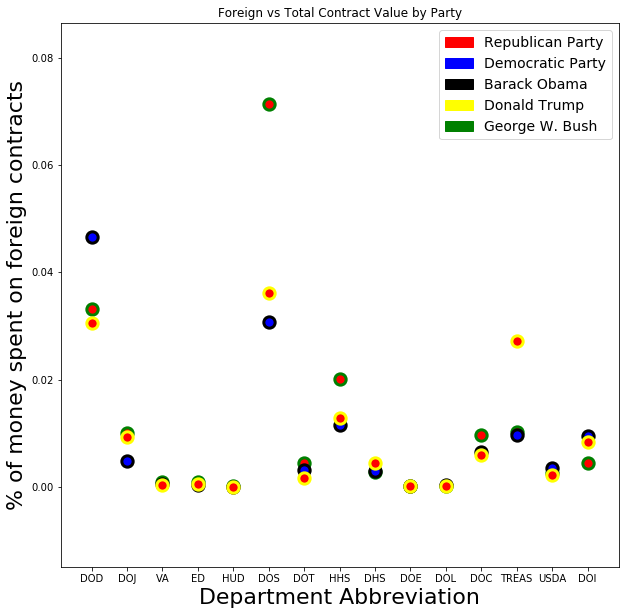

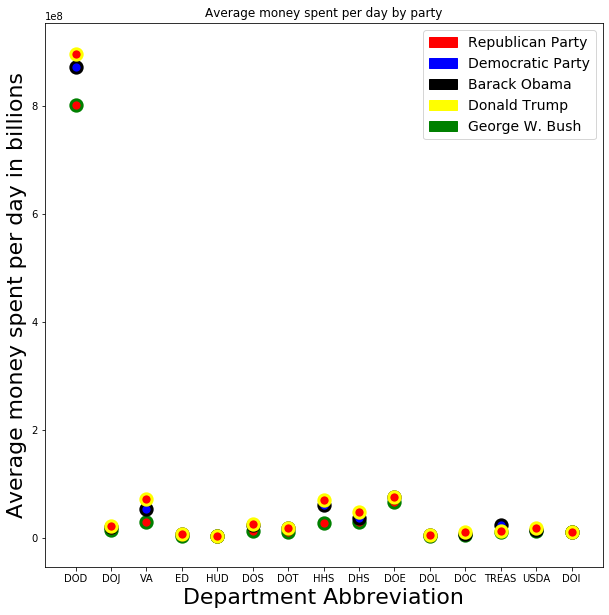

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams["axes.labelsize"] = 22
plt.rcParams["legend.fontsize"] = 14


fileName = 'cabinet_member_spending.csv'
deptSet = set()
presList = ['George W. Bush', 'Barack Obama', 'Donald Trump']
df = pd.read_csv(fileName,header=0)
percentAsForeign = []
for index, row in df.iterrows():
    percentAsForeign.append(row[7]/(row[6] + row[7]))
df['percentAsForeign'] = percentAsForeign
for _,row in df.iterrows():
    deptSet.add(row.Department)
spendingByDeptPresBreakdown = {dept: [] for dept in deptSet}
#compare percentage spent foreign by department with breakdown by party
for dept in deptSet:
    deptDF = df[df.Department == dept]
    byDeptPresSpending  = []
    for pres in presList: #get DF for each president, average their daily amount, plot
        presDF = deptDF[deptDF.President == pres]
        byDeptPresSpending.append(presDF.percentAsForeign.mean())#mean spent
    spendingByDeptPresBreakdown[dept] = byDeptPresSpending

plotByDept(presList,spendingByDeptPresBreakdown)
plt.ylabel('% of money spent on foreign contracts')
plt.xlabel('Department Abbreviation')
plt.title('Foreign vs Total Contract Value by Party')
plt.show()

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams["axes.labelsize"] = 22
fileName = 'cabinet_member_spending.csv'
deptSet = set()
df = pd.read_csv(fileName,header=0)
moneyPerDay = []
for index, row in df.iterrows():
    moneyPerDay.append((row[7] + row[6])/row[5])
df['moneyPerDay'] = moneyPerDay
for _,row in df.iterrows():
    deptSet.add(row.Department)
spendingByDeptPresBreakdown = {dept: [] for dept in deptSet}
#compare money/day spent by department with breakdown by party
for dept in deptSet:
    deptDF = df[df.Department == dept]
    byDeptPresSpending  = []
    for pres in presList: #get DF for each president, average their daily amount, plot
        presDF = deptDF[deptDF.President == pres]
        byDeptPresSpending.append(presDF.moneyPerDay.mean())#mean spent
    spendingByDeptPresBreakdown[dept] = byDeptPresSpending

for pres in range(len(presList)):
    color = 0
    if pres == 0 or pres == 2:
        color = 'red'
    else:
        color = 'blue'
    plt.scatter([deptName.split("(")[1].split(")")[0] for deptName in spendingByDeptPresBreakdown], 
            [spendingByDeptPresBreakdown[deptName][pres] for deptName in spendingByDeptPresBreakdown],
               c = color)
plotByDept(presList,spendingByDeptPresBreakdown)
plt.ylabel("Average money spent per day in billions")
plt.title("Average money spent per day by party")
plt.xlabel('Department Abbreviation')

plt.show()
    

In [1]:
def plotByDept(presList, spendingByDeptPresBreakdown):
    for pres in range(len(presList)):
        edgeColor = 0
        if pres == 0:
            edgeColor = 'green'
        elif pres == 1:
            edgeColor = 'black'
        else :
            edgeColor = 'yellow'

        plt.scatter([deptName.split("(")[1].split(")")[0] for deptName in spendingByDeptPresBreakdown], 
                [spendingByDeptPresBreakdown[deptName][pres] for deptName in spendingByDeptPresBreakdown], 
                    edgecolors=edgeColor, s = 128,
                    facecolors=('blue' if pres == 1 else 'red'), linewidths=3)
    red_patch = mpatches.Patch(color='red', label='Republican Party')
    blue_patch = mpatches.Patch(color='blue', label='Democratic Party')
    purple_patch = mpatches.Patch(color='black', label='Barack Obama')
    yellow_patch = mpatches.Patch(color='yellow', label='Donald Trump')
    green_patch = mpatches.Patch(color='green', label='George W. Bush')
    plt.legend(handles=[red_patch,blue_patch,purple_patch,yellow_patch,green_patch])